In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('part1_station_data.csv')
yelp_df = pd.read_csv('part2_yelp_data.csv')
foursquare_df = pd.read_csv('part2_foursquare_data.csv')

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [5]:
merged_df = pd.merge(df, foursquare_df, on=['latitude', 'longitude'], how='left')
merged_df = pd.merge(merged_df, yelp_df, on=['latitude', 'longitude'], how='left', suffixes=('_foursquare', '_yelp'))

merged_df

,latitude,longitude,num_bikes,name_foursquare,category,name_yelp,rating
0,50.961008,6.930710,0,NaN,NaN,NaN,NaN
1,50.926356,6.957092,2,NaN,NaN,NaN,NaN
2,50.938831,6.906270,5,NaN,NaN,NaN,NaN
3,50.972420,6.951578,0,NaN,NaN,NaN,NaN
4,50.935485,6.961159,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
156,50.936455,6.956969,0,NaN,NaN,NaN,NaN
157,50.939000,6.956760,1,NaN,NaN,NaN,NaN
158,50.937682,6.957465,0,NaN,NaN,NaN,NaN
159,50.941844,6.957306,0,NaN,NaN,NaN,NaN


In [8]:
# Check for missing values and calculate the count of missing values in each column
missing_values = merged_df.isnull().sum()

# Print the columns with missing values and their respective counts
print(missing_values)


latitude             0
longitude            0
num_bikes            0
name_foursquare    161
category           161
name_yelp          161
rating             161
dtype: int64


In [23]:
# Create new columns to store rounded latitude and longitude values
df['latitude_rounded'] = df['latitude'].round(3)
df['longitude_rounded'] = df['longitude'].round(3)

yelp_df['latitude_rounded'] = yelp_df['latitude'].round(3)
yelp_df['longitude_rounded'] = yelp_df['longitude'].round(3)

foursquare_df['latitude_rounded'] = foursquare_df['latitude'].round(3)
foursquare_df['longitude_rounded'] = foursquare_df['longitude'].round(3)

# Merge using the new columns
merged_df = pd.merge(df, foursquare_df, left_on=['latitude_rounded', 'longitude_rounded'], right_on=['latitude_rounded', 'longitude_rounded'], how='left')
merged_df = pd.merge(merged_df, yelp_df, left_on=['latitude_rounded', 'longitude_rounded'], right_on=['latitude_rounded', 'longitude_rounded'], how='left', suffixes=('_foursquare', '_yelp'))

merged_df


,latitude_x,longitude_x,num_bikes,latitude_rounded,longitude_rounded,name_foursquare,latitude_y,longitude_y,category,name_yelp,latitude,longitude,rating
0,50.961008,6.930710,0,50.961,6.931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50.926356,6.957092,2,50.926,6.957,NaN,NaN,NaN,NaN,Toscanini,50.925620,6.957130,4.5
2,50.926356,6.957092,2,50.926,6.957,NaN,NaN,NaN,NaN,Toscanini,50.925620,6.957130,4.5
3,50.926356,6.957092,2,50.926,6.957,NaN,NaN,NaN,NaN,Toscanini,50.925620,6.957130,4.5
4,50.938831,6.906270,5,50.939,6.906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,50.941844,6.957306,0,50.942,6.957,Gaffel am Dom GmbH & Co,50.94214,6.957064,Rhenisch Restaurant,Asia gourmet,50.941915,6.957445,3.5
2327,50.941844,6.957306,0,50.942,6.957,Gaffel am Dom GmbH & Co,50.94214,6.957064,Rhenisch Restaurant,Haferkater,50.941915,6.957445,4.5
2328,50.941844,6.957306,0,50.942,6.957,Gaffel am Dom GmbH & Co,50.94214,6.957064,Rhenisch Restaurant,Hanse Stube,50.941900,6.956660,4.0
2329,50.941844,6.957306,0,50.942,6.957,Gaffel am Dom GmbH & Co,50.94214,6.957064,Rhenisch Restaurant,Hanse Stube,50.941900,6.956660,4.0


In [24]:
columns_to_keep = [
    'latitude_rounded', 'longitude_rounded', 'num_bikes', 
    'name_foursquare', 'category', 'name_yelp', 'rating'
]

merged_df = merged_df[columns_to_keep]

merged_df.head()


,latitude_rounded,longitude_rounded,num_bikes,name_foursquare,category,name_yelp,rating
0,50.961,6.931,0,NaN,NaN,NaN,NaN
1,50.926,6.957,2,NaN,NaN,Toscanini,4.5
2,50.926,6.957,2,NaN,NaN,Toscanini,4.5
3,50.926,6.957,2,NaN,NaN,Toscanini,4.5
4,50.939,6.906,5,NaN,NaN,NaN,NaN


In [25]:
# Check for missing values and calculate the count of missing values in each column
missing_values = merged_df.isnull().sum()

# Print the columns with missing values and their respective counts
print(missing_values)


latitude_rounded       0
longitude_rounded      0
num_bikes              0
name_foursquare      235
category             235
name_yelp            178
rating               178
dtype: int64


In [26]:
# Remove rows containing missing values
merged_df = merged_df.dropna()


merged_df


,latitude_rounded,longitude_rounded,num_bikes,name_foursquare,category,name_yelp,rating
6,50.935,6.961,1,"Brauerei zur Malzmühle, Gaststätte",Restaurant,HÖHNERStall,4.0
7,50.935,6.961,1,"Brauerei zur Malzmühle, Gaststätte",Restaurant,HÖHNERStall,4.0
8,50.935,6.961,1,"Brauerei zur Malzmühle, Gaststätte",Restaurant,HÖHNERStall,4.0
9,50.935,6.961,1,"Brauerei zur Malzmühle, Gaststätte",Restaurant,HÖHNERStall,4.0
10,50.935,6.961,1,"Brauerei zur Malzmühle, Gaststätte",Restaurant,HÖHNERStall,4.0
...,...,...,...,...,...,...,...
2325,50.942,6.957,0,Gaffel am Dom GmbH & Co,Rhenisch Restaurant,Meister Bock,4.0
2326,50.942,6.957,0,Gaffel am Dom GmbH & Co,Rhenisch Restaurant,Asia gourmet,3.5
2327,50.942,6.957,0,Gaffel am Dom GmbH & Co,Rhenisch Restaurant,Haferkater,4.5
2328,50.942,6.957,0,Gaffel am Dom GmbH & Co,Rhenisch Restaurant,Hanse Stube,4.0


In [27]:
# Remove duplicate rows
merged_df = merged_df.drop_duplicates().reset_index(drop=True)

# Check the processed data
merged_df.head()


,latitude_rounded,longitude_rounded,num_bikes,name_foursquare,category,name_yelp,rating
0,50.935,6.961,1,"Brauerei zur Malzmühle, Gaststätte",Restaurant,HÖHNERStall,4.0
1,50.922,6.960,1,Lalezar,Turkish Restaurant,"FRÜH ""Em Veedel""",4.0
2,50.922,6.960,1,Früh em Veedel,Rhenisch Restaurant,"FRÜH ""Em Veedel""",4.0
3,50.922,6.960,1,Bistro Restaurant Kajtek-Polnische Leckerbissen,Bistro,"FRÜH ""Em Veedel""",4.0
4,50.922,6.960,1,Kajtek,Bar,"FRÜH ""Em Veedel""",4.0


In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   latitude_rounded   51 non-null     float64
 1   longitude_rounded  51 non-null     float64
 2   num_bikes          51 non-null     int64  
 3   name_foursquare    51 non-null     object 
 4   category           51 non-null     object 
 5   name_yelp          51 non-null     object 
 6   rating             51 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.9+ KB


In [33]:
merged_df.to_csv('part3_merged_data.csv', index=False)


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\LIN\AppData\Local\anaconda3\envs\e1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LIN\AppData\Local\anaconda3\envs\e1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LIN\AppData\Local\anaconda3\envs\e1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


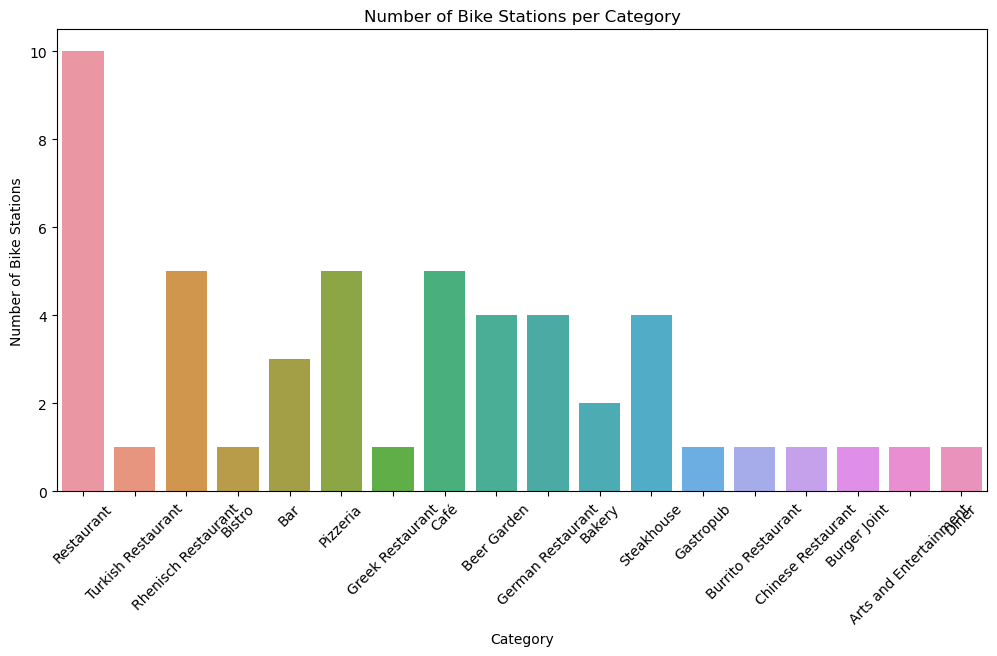

In [31]:
# Mapping the number of bicycle stations in each category
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=merged_df)
plt.title('Number of Bike Stations per Category')
plt.xlabel('Category')
plt.ylabel('Number of Bike Stations')
plt.xticks(rotation=45)
plt.show()

We found that certain types of dining establishments, such as traditional restaurants, were surrounded by more bicycle stations. This may reflect their popularity and accessibility in the urban layout.

c:\Users\LIN\AppData\Local\anaconda3\envs\e1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LIN\AppData\Local\anaconda3\envs\e1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LIN\AppData\Local\anaconda3\envs\e1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


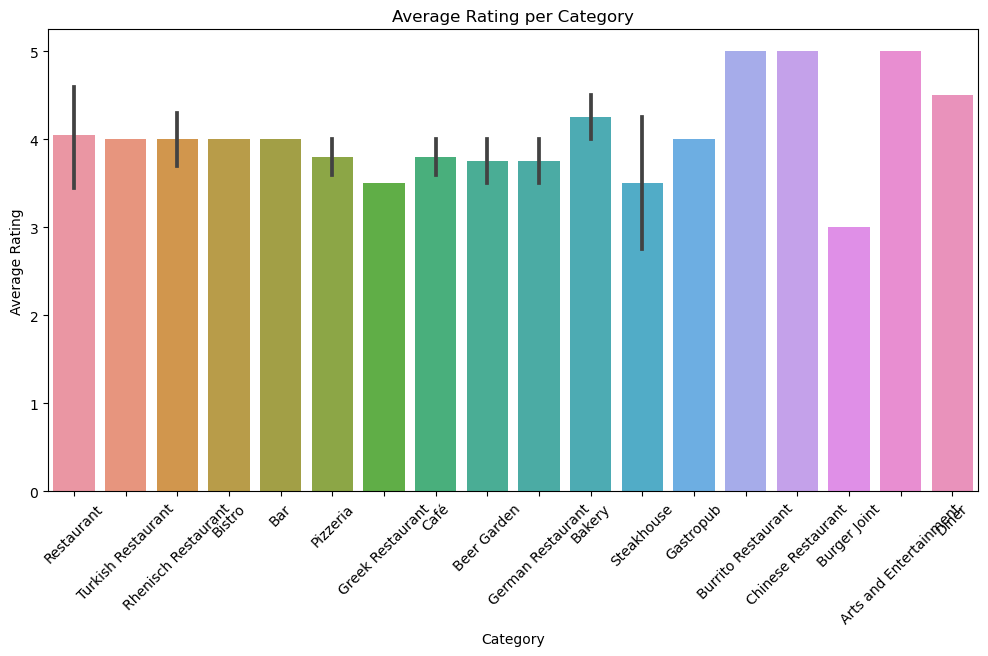

In [32]:
#Plotting average ratings for each category
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='rating', data=merged_df)
plt.title('Average Rating per Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

While most categories were rated high, arts and entertainment venues appeared to have the highest average ratings, which may indicate the importance of these locations to the city's cultural and leisure life.

c:\Users\LIN\AppData\Local\anaconda3\envs\e1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LIN\AppData\Local\anaconda3\envs\e1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


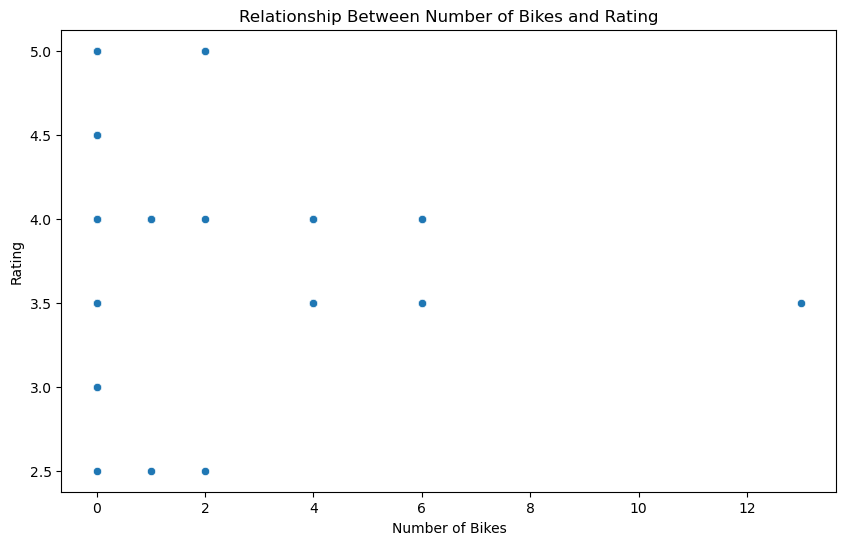

In [37]:
#Relationship between number of bicycle stations and ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_bikes', y='rating', data=merged_df)
plt.title('Relationship Between Number of Bikes and Rating')
plt.xlabel('Number of Bikes')
plt.ylabel('Rating')
plt.show()

c:\Users\LIN\AppData\Local\anaconda3\envs\e1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LIN\AppData\Local\anaconda3\envs\e1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LIN\AppData\Local\anaconda3\envs\e1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LIN\AppData\Local\anaconda3\envs\e1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

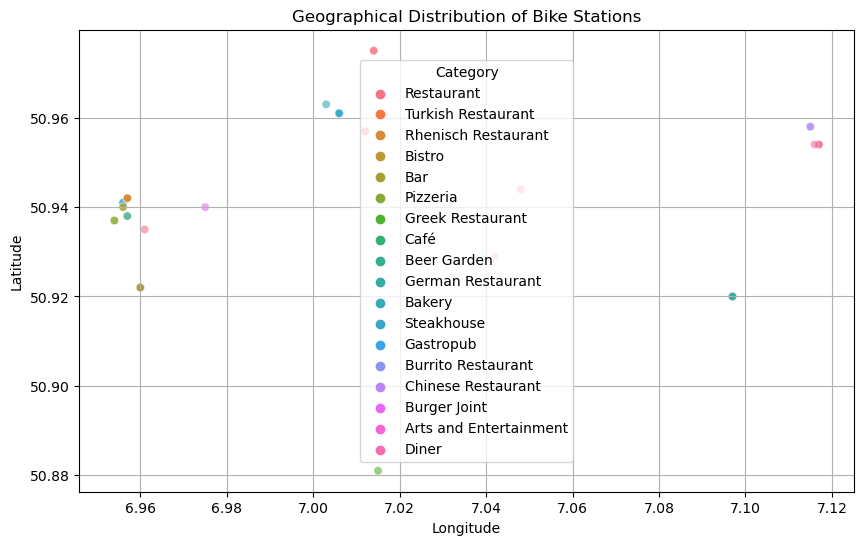

In [40]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='longitude_rounded', y='latitude_rounded', data=merged_df, hue='category', alpha=0.6)

plt.title('Geographical Distribution of Bike Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Category')
plt.grid(True)
plt.show()


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Look at the data before and after the join to validate your data.

In [34]:
import sqlite3

# Create an SQLite database
conn = sqlite3.connect('data/my_database.db')

# Store the DataFrame in the database
merged_df.to_sql('bike_poi_data', conn, if_exists='replace', index=False)

# Verify the data
# Query data from the database
test_df = pd.read_sql_query("SELECT * FROM bike_poi_data", conn)
print(test_df.head())

# Close the database connection
conn.close()


   latitude_rounded  longitude_rounded  num_bikes  \
0            50.935              6.961          1   
1            50.922              6.960          1   
2            50.922              6.960          1   
3            50.922              6.960          1   
4            50.922              6.960          1   

                                   name_foursquare             category  \
0               Brauerei zur Malzmühle, Gaststätte           Restaurant   
1                                          Lalezar   Turkish Restaurant   
2                                   Früh em Veedel  Rhenisch Restaurant   
3  Bistro Restaurant Kajtek-Polnische Leckerbissen               Bistro   
4                                           Kajtek                  Bar   

          name_yelp  rating  
0       HÖHNERStall     4.0  
1  FRÜH "Em Veedel"     4.0  
2  FRÜH "Em Veedel"     4.0  
3  FRÜH "Em Veedel"     4.0  
4  FRÜH "Em Veedel"     4.0  
